In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import json
import os

# Function to get the current list of S&P 500 tickers
def get_sp500_tickers(csv_file='sp500_companies.csv'):
    try:
        sp500_df = pd.read_csv(csv_file)
        # Using a list comprehension for a more efficient and cleaner approach
        sp500_tickers = [ticker for ticker in sp500_df['Symbol'] if isinstance(ticker, str)]
        return sp500_tickers
    except FileNotFoundError:
        print(f"Error: The file {csv_file} was not found.")
        return []

# Function to collect stock data using the yfinance library
def get_stock_data_yf(tickers, start, end):
    all_stock_data = {}
    for ticker in tickers:
        print(f"Collecting data for {ticker} using yfinance...")
        try:
            # We explicitly set auto_adjust=True to get the adjusted prices
            stock_data = yf.download(ticker, start=start, end=end, progress=False, auto_adjust=True)
            
            if not stock_data.empty:
                # The 'Close' column now holds the adjusted price data
                stock_data['Return'] = stock_data['Close'].pct_change()
                stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
                all_stock_data[ticker] = stock_data['Return']
            else:
                print(f"No data found for {ticker} using yfinance.")
                
        except Exception as e:
            print(f"Error collecting data for {ticker} using yfinance: {e}")
    return all_stock_data

# Function to collect stock data using the Financial Modeling Prep API
def get_stock_data_fmp(tickers, api_key, start, end):
    base_url = "https://financialmodelingprep.com/api/v3/historical-price/"
    all_stock_data = {}
    for ticker in tickers:
        print(f"Collecting data for {ticker} using FMP...")
        try:
            url = f"{base_url}{ticker}?from={start}&to={end}&apikey={api_key}"
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for bad status codes
            
            data = json.loads(response.text)
            
            if 'historical' in data:
                df = pd.DataFrame(data['historical'])
                df['date'] = pd.to_datetime(df['date'])
                df.set_index('date', inplace=True)
                df.sort_index(inplace=True)
                df['Return'] = df['adjClose'].pct_change()
                df['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
                all_stock_data[ticker] = df['Return']
            else:
                print(f"No historical data found for {ticker} on FMP.")
                
        except Exception as e:
            print(f"Error collecting data for {ticker} using FMP: {e}")
    return all_stock_data

# Main execution function
def main():
    # Set the start and end dates for data collection
    START_DATE = '2010-01-01'
    END_DATE = '2020-12-31'
    
    # Financial Modeling Prep API key (if needed as a fallback)
    FMP_API_KEY = os.getenv('FMP_API_KEY')
    
    # Get the list of S&P 500 tickers
    tickers = get_sp500_tickers()
    
    if not tickers:
        print("No tickers to process. Exiting.")
        return

    # First attempt to get data using yfinance
    stock_returns = get_stock_data_yf(tickers, START_DATE, END_DATE)

    # Fallback to FMP for tickers where yfinance failed
    failed_tickers = [ticker for ticker in tickers if ticker not in stock_returns]
    if failed_tickers and FMP_API_KEY:
        print("\nAttempting to collect data for failed tickers using FMP...")
        fmp_returns = get_stock_data_fmp(failed_tickers, FMP_API_KEY, START_DATE, END_DATE)
        stock_returns.update(fmp_returns)
    elif failed_tickers:
        print("\nNo FMP API key provided. Cannot use FMP as a fallback.")
    
    # Convert the dictionary of returns to a single DataFrame
    returns_df = pd.DataFrame(stock_returns)
    returns_df.to_csv('stock_returns.csv')
    print("\nFinal DataFrame of stock returns (first 5 rows):")
    print(returns_df.head())
    
if __name__ == "__main__":
    main()

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['GEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for GEV using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['CEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for CEG using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['KVUE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for KVUE using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['GEHC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for GEHC using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for VLTO using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for SOLV using yfinance.


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\3498618720.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return'].replace([np.inf, -np.inf], np.nan, inplace=True)



1 Failed download:
['AMTM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


No data found for AMTM using yfinance.

No FMP API key provided. Cannot use FMP as a fallback.

Final DataFrame of stock returns (first 5 rows):
                AAPL      NVDA      MSFT      AMZN     GOOGL      GOOG  META  \
Date                                                                           
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2010-01-05  0.001729  0.014603  0.000323  0.005900 -0.004404 -0.004404   NaN   
2010-01-06 -0.015906  0.006396 -0.006137 -0.018116 -0.025209 -0.025209   NaN   
2010-01-07 -0.001849 -0.019598 -0.010399 -0.017013 -0.023280 -0.023280   NaN   
2010-01-08  0.006649  0.002161  0.006897  0.027077  0.013331  0.013331   NaN   

            TSLA      AVGO     BRK-B  ...       APA       MOS      PARA  \
Date                                  ...                                 
2010-01-04   NaN       NaN       NaN  ...       NaN       NaN       NaN   
2010-01-05   NaN  0.007423  0.004832  ...  0.011807  0.023335 -0.0049

In [2]:
returns_df = pd.read_csv('stock_returns.csv')
returns_df.head()

Date      AAPL      NVDA      MSFT      AMZN     GOOGL      GOOG  \
0  2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1  2010-01-05  0.001729  0.014603  0.000323  0.005900 -0.004404 -0.004404   
2  2010-01-06 -0.015906  0.006396 -0.006137 -0.018116 -0.025209 -0.025209   
3  2010-01-07 -0.001849 -0.019598 -0.010399 -0.017013 -0.023280 -0.023280   
4  2010-01-08  0.006649  0.002161  0.006897  0.027077  0.013331  0.013331   

   META  TSLA      AVGO  ...       APA       MOS      PARA       MHK  \
0   NaN   NaN       NaN  ...       NaN       NaN       NaN       NaN   
1   NaN   NaN  0.007423  ...  0.011807  0.023335 -0.004913 -0.003933   
2   NaN   NaN  0.007894  ...  0.015683  0.038321 -0.031735 -0.003948   
3   NaN   NaN -0.006266  ... -0.015165  0.002898  0.019665  0.017526   
4   NaN   NaN  0.007356  ... -0.005227  0.014294  0.010714  0.017839   

         CE  HII  CZR       BWA  QRVO       FMC  
0       NaN  NaN  NaN       NaN   NaN       NaN  
1  0.022249  NaN  NaN  0.047661   NaN -0.003344  
2  0.010882  NaN  NaN  0.036734   NaN  0.009712  
3  0.005237  NaN  NaN  0.013627   NaN -0.012417  
4 -0.009262  NaN  NaN -0.018285   NaN -0.008854  

[5 rows x 496 columns]

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import json
import os

# Function to get the current list of S&P 500 tickers and their industries
def get_sp500_data(csv_file='sp500_companies.csv'):
    try:
        sp500_df = pd.read_csv(csv_file)
        sp500_df = sp500_df.dropna(subset=['Symbol', 'Industry'])
        sp500_df['Symbol'] = sp500_df['Symbol'].str.strip()
        return sp500_df
    except FileNotFoundError:
        print(f"Error: The file {csv_file} was not found.")
        return pd.DataFrame()

# Function to get fundamental data (P/E and P/B) for a list of tickers
def get_fundamental_data_yf(tickers):
    fundamental_data = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            pe_ratio = info.get('trailingPE')
            pb_ratio = info.get('priceToBook')
            fundamental_data[ticker] = {'PE_Ratio': pe_ratio, 'PB_Ratio': pb_ratio}
        except Exception as e:
            print(f"Error getting fundamental data for {ticker}: {e}")
            fundamental_data[ticker] = {'PE_Ratio': np.nan, 'PB_Ratio': np.nan}
    return pd.DataFrame.from_dict(fundamental_data, orient='index')

# Function to collect all required data for a given list of tickers
def get_all_data(tickers, start, end):
    # 1. Download OHLCV data using yfinance for all tickers at once
    print("Collecting OHLCV data for all tickers...")
    try:
        all_data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)
        if all_data.empty:
            print("No OHLCV data found for the given tickers.")
            return None
    except Exception as e:
        print(f"Error downloading bulk OHLCV data: {e}")
        return None

    # 2. Get Market Index Rate of Return (^GSPC)
    print("Collecting data for the S&P 500 Index...")
    try:
        market_index_data = yf.download('^GSPC', start=start, end=end, progress=False, auto_adjust=True)
        if not market_index_data.empty:
            market_index_data['Market_Index_Return'] = market_index_data['Close'].pct_change()
            market_index_return = market_index_data[['Market_Index_Return']]
        else:
            print("No data found for ^GSPC.")
            market_index_return = pd.DataFrame(index=all_data.index)
            market_index_return['Market_Index_Return'] = np.nan
    except Exception as e:
        print(f"Error collecting market index data: {e}")
        market_index_return = pd.DataFrame(index=all_data.index)
        market_index_return['Market_Index_Return'] = np.nan
        
    return all_data, market_index_return

# Main execution function
def main():
    START_DATE = '2010-01-01'
    END_DATE = '2020-12-31'
    
    # Get the list of S&P 500 tickers and their industries
    sp500_df = get_sp500_data()
    if sp500_df.empty:
        print("S&P 500 data could not be loaded. Exiting.")
        return

    tickers = sp500_df['Symbol'].tolist()
    
    # Get all required time-series data
    stock_data, market_index_returns = get_all_data(tickers, START_DATE, END_DATE)

    if stock_data is None:
        print("Data collection failed. Exiting.")
        return

    # Calculate Industry Index Rate of Return
    print("Calculating Industry Index Returns...")
    industry_data = sp500_df.set_index('Symbol')
    industry_data = industry_data[industry_data.index.isin(tickers)]
    
    # Calculate daily returns for each stock
    daily_returns = stock_data['Close'].pct_change()

    # Group by industry and calculate the mean daily return for each industry
    industry_mapping = industry_data['Industry'].to_dict()
    daily_returns.columns = pd.MultiIndex.from_product([['Daily_Returns'], daily_returns.columns])
    
    temp_df = daily_returns.T.reset_index(level=0, drop=True)
    temp_df['Industry'] = temp_df.index.map(industry_mapping)
    
    industry_returns = temp_df.groupby('Industry').mean().T
    industry_returns.columns = [f'Industry_Return_{col.replace(" ", "_")}' for col in industry_returns.columns]

    # Get fundamental data (P/E, P/B) - Note: yfinance.info provides the most recent data, not historical
    print("Collecting fundamental data (P/E, P/B)...")
    fundamental_data_df = get_fundamental_data_yf(tickers)

    # Prepare final DataFrame
    print("Combining all data into a single DataFrame...")
    final_df = pd.DataFrame(index=stock_data.index)
    
    # Join OHLCV data
    final_df = final_df.join(stock_data)

    # Join Market Index Returns
    final_df = final_df.join(market_index_returns)

    # Join Industry Index Returns
    final_df = final_df.join(industry_returns)

    # Join Fundamental Data
    # Since fundamental data is not a time series, we need to handle it differently
    for ticker in tickers:
        final_df[f'{ticker}_PE'] = fundamental_data_df.loc[ticker]['PE_Ratio']
        final_df[f'{ticker}_PB'] = fundamental_data_df.loc[ticker]['PB_Ratio']

    # Clean up and save the final DataFrame
    print("Saving the final DataFrame to 'investment_data.csv'...")
    final_df.to_csv('investment_data.csv')
    
    print("\nData collection and saving complete. The file 'investment_data.csv' has been created.")
    
if __name__ == "__main__":
    main()


7 Failed downloads:
['SOLV', 'CEG', 'AMTM', 'GEV', 'GEHC', 'KVUE', 'VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


Calculating Industry Index Returns...
Combining all data into a single DataFrame...


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\1498156053.py:112: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  final_df = final_df.join(stock_data)
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\1498156053.py:115: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  final_df = final_df.join(market_index_returns)
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\1498156053.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[f'{ticker}_PE'] = fundamental_data_df.loc[ticker]['PE_Ratio']
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\1498156053.py:124

Saving the final DataFrame to 'investment_data.csv'...

Data collection and saving complete. The file 'investment_data.csv' has been created.


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import json
import os

# Function to get the current list of S&P 500 tickers and their industries
def get_sp500_data(csv_file='sp500_companies.csv'):
    try:
        sp500_df = pd.read_csv(csv_file)
        sp500_df = sp500_df.dropna(subset=['Symbol', 'Industry'])
        sp500_df['Symbol'] = sp500_df['Symbol'].str.strip()
        return sp500_df
    except FileNotFoundError:
        print(f"Error: The file {csv_file} was not found.")
        return pd.DataFrame()

# Main execution function
def main():
    START_DATE = '2010-01-01'
    END_DATE = '2020-12-31'
    
    sp500_df = get_sp500_data()
    if sp500_df.empty:
        print("S&P 500 data could not be loaded. Exiting.")
        return

    tickers = sp500_df['Symbol'].tolist()
    
    all_factor_data = {}

    print("Collecting OHLCV data for all tickers...")
    try:
        ohlcv_data = yf.download(tickers, start=START_DATE, end=END_DATE, progress=False, auto_adjust=True)
        if not ohlcv_data.empty:
            all_factor_data['OHLCV'] = ohlcv_data
        else:
            print("No OHLCV data found for the given tickers.")
            
    except Exception as e:
        print(f"Error downloading bulk OHLCV data: {e}")

    if 'OHLCV' not in all_factor_data:
        return
    
    print("Collecting data for the S&P 500 Index...")
    try:
        market_index_data = yf.download('^GSPC', start=START_DATE, end=END_DATE, progress=False, auto_adjust=True)
        if not market_index_data.empty:
            market_index_data['Market_Index_Return'] = market_index_data['Close'].pct_change()
            all_factor_data['Market_Index_Return'] = market_index_data[['Market_Index_Return']]
        else:
            print("No data found for ^GSPC.")
    except Exception as e:
        print(f"Error collecting market index data: {e}")

    print("Collecting fundamental data (P/E, P/B)...")
    fundamental_data = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            pe_ratio = info.get('trailingPE')
            pb_ratio = info.get('priceToBook')
            fundamental_data[ticker] = {'PE_Ratio': pe_ratio, 'PB_Ratio': pb_ratio}
        except Exception as e:
            fundamental_data[ticker] = {'PE_Ratio': np.nan, 'PB_Ratio': np.nan}
    
    fundamental_df = pd.DataFrame.from_dict(fundamental_data, orient='index')
    
    # Corrected section for calculating Industry Index Rate of Return
    print("Calculating Industry Index Returns...")
    
    # Get a DataFrame with only the Close prices, with tickers as columns
    daily_close_prices = all_factor_data['OHLCV']['Close']
    
    # Create a mapping of tickers to their industries
    industry_mapping = sp500_df.set_index('Symbol')['Industry'].to_dict()
    
    # Use the mapping to group the columns by industry and calculate the mean daily return
    daily_returns_by_industry = daily_close_prices.pct_change().groupby(industry_mapping, axis=1).mean()
    
    daily_returns_by_industry.columns = [f'{col}_Industry_Return' for col in daily_returns_by_industry.columns]

    all_factor_data['Industry_Returns'] = daily_returns_by_industry

    print("Combining all data into a single DataFrame...")
    final_df = pd.DataFrame(index=all_factor_data['OHLCV'].index)
    
    if 'Market_Index_Return' in all_factor_data:
        final_df = final_df.join(all_factor_data['Market_Index_Return'])
    
    if 'Industry_Returns' in all_factor_data:
        final_df = final_df.join(all_factor_data['Industry_Returns'])

    for ticker, values in fundamental_df.iterrows():
        final_df[f'{ticker}_PE'] = values['PE_Ratio']
        final_df[f'{ticker}_PB'] = values['PB_Ratio']

    final_df = final_df.join(all_factor_data['OHLCV'])
    
    print("Saving the final DataFrame to 'investment_data1.csv'...")
    final_df.to_csv('investment_data1.csv')
    
    print("\nData collection and saving complete. The file 'investment_data.csv' has been created.")
    
if __name__ == "__main__":
    main()


7 Failed downloads:
['SOLV', 'CEG', 'AMTM', 'GEV', 'GEHC', 'KVUE', 'VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-01-01 -> 2020-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1262322000, endDate = 1609390800")')


Calculating Industry Index Returns...
Combining all data into a single DataFrame...


C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\244966151.py:92: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  final_df = final_df.join(all_factor_data['Market_Index_Return'])
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\244966151.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[f'{ticker}_PE'] = values['PE_Ratio']
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_5080\244966151.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

Saving the final DataFrame to 'investment_data1.csv'...

Data collection and saving complete. The file 'investment_data.csv' has been created.


In [1]:
import pandas as pd

try:
    # Load your data
    df = pd.read_csv('investment_data1.csv', index_col=0, parse_dates=True)

    # Print all column names
    print("Columns in 'investment_data1.csv':")
    for col in df.columns:
        print(col)

except FileNotFoundError:
    print("Error: 'investment_data1.csv' not found. Please ensure the file is in the same directory as this script.")
except Exception as e:
    print(f"An error occurred: {e}")

Columns in 'investment_data1.csv':
('Market_Index_Return', '')
Advertising Agencies_Industry_Return
Aerospace & Defense_Industry_Return
Agricultural Inputs_Industry_Return
Airlines_Industry_Return
Apparel Manufacturing_Industry_Return
Apparel Retail_Industry_Return
Asset Management_Industry_Return
Auto & Truck Dealerships_Industry_Return
Auto Manufacturers_Industry_Return
Auto Parts_Industry_Return
Banks - Diversified_Industry_Return
Banks - Regional_Industry_Return
Beverages - Brewers_Industry_Return
Beverages - Non-Alcoholic_Industry_Return
Beverages - Wineries & Distilleries_Industry_Return
Biotechnology_Industry_Return
Building Materials_Industry_Return
Building Products & Equipment_Industry_Return
Capital Markets_Industry_Return
Chemicals_Industry_Return
Communication Equipment_Industry_Return
Computer Hardware_Industry_Return
Confectioners_Industry_Return
Conglomerates_Industry_Return
Consulting Services_Industry_Return
Consumer Electronics_Industry_Return
Copper_Industry_Return


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import ast # Import the ast module for safe evaluation of string literals

# Load your data
try:
    # Load with a single header, as the "multi-index" names appear to be string representations of tuples
    df = pd.read_csv('investment_data1.csv', index_col=0, parse_dates=True)
    print("Data loaded successfully with single header.")
    print(f"Initial DataFrame shape: {df.shape}")
    print("Raw DataFrame columns (first 10):", df.columns.tolist()[:10])

    # Manually parse column names that are string representations of tuples
    new_columns = []
    for col_name in df.columns:
        try:
            # Safely evaluate if the column name is a string representation of a tuple
            evaluated_col = ast.literal_eval(col_name)
            new_columns.append(evaluated_col)
        except (ValueError, SyntaxError):
            # If it's not a tuple string, keep it as is (e.g., 'AAPL_PE', 'Industry_Return')
            new_columns.append(col_name)
    df.columns = new_columns
    print("Columns parsed to tuples where applicable.")
    print("Parsed DataFrame columns (first 10):", df.columns.tolist()[:10])

except FileNotFoundError:
    print("Error: 'investment_data1.csv' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during data loading or column parsing: {e}")
    exit()

# --- Data Preprocessing and Feature/Target Selection ---

# 1. Identify Target Stocks and Calculate their Daily Logarithmic Returns
# The paper defines R_t = ln(P_t / P_{t-1})
target_tickers = []
# Now, 'all_close_cols' will correctly identify tuple columns like ('Close', 'AAPL')
all_close_cols = [col for col in df.columns if isinstance(col, tuple) and col[0] == 'Close']

# Extract unique tickers from the ('Close', 'TICKER') columns
unique_close_tickers = sorted(list(set([col[1] for col in all_close_cols])))

# Select the first 100 tickers as targets, or fewer if less than 100 are available
num_target_tickers = min(100, len(unique_close_tickers))
selected_target_tickers = unique_close_tickers[:num_target_tickers]

if not selected_target_tickers:
    print("Error: No 'Close' price columns found for any tickers after parsing. Cannot define target variables.")
    exit()

print(f"\nSelected {len(selected_target_tickers)} target tickers: {selected_target_tickers}")

target_df = pd.DataFrame(index=df.index)
for ticker in selected_target_tickers:
    close_col_name = ('Close', ticker) # This will now be an actual tuple
    if close_col_name in df.columns:
        # Ensure the column is numeric before calculation
        df[close_col_name] = pd.to_numeric(df[close_col_name], errors='coerce')
        target_df[f'Daily_Return_{ticker}'] = np.log(df[close_col_name] / df[close_col_name].shift(1))
    else:
        print(f"Warning: Close price for {ticker} (expected as {close_col_name}) not found, skipping as target.")

# Drop any target columns that ended up being all NaN (e.g., if a ticker had no valid close data)
target_df.dropna(axis=1, how='all', inplace=True)
target_columns = target_df.columns.tolist()

if not target_columns:
    print("Error: No valid target columns could be created after calculating returns and dropping NaNs.")
    exit()

print(f"Created {len(target_columns)} target return columns.")

# 2. Identify Feature Columns (X) based on the paper and notebook structure
feature_columns = []

# Add Market_Index_Return
# Now, it should be identified as a tuple ('Market_Index_Return', '')
market_index_col_name = ('Market_Index_Return', '')
if market_index_col_name in df.columns:
    feature_columns.append(market_index_col_name)
    print("Added 'Market_Index_Return' (tuple format) to features.")
else:
    print("Warning: 'Market_Index_Return' (expected as tuple) not found.")


# Add Industry_Returns
# These are simple strings, so the original logic for them should work
industry_return_cols = [col for col in df.columns if isinstance(col, str) and col.endswith('_Industry_Return')]
if industry_return_cols:
    feature_columns.extend(industry_return_cols)
    print(f"Added {len(industry_return_cols)} industry return columns to features.")
else:
    print("No columns ending with '_Industry_Return' found.")

# Add PE and PB ratios for all tickers
# These are simple strings, so the original logic for them should work
pe_pb_cols = [col for col in df.columns if isinstance(col, str) and (col.endswith('_PE') or col.endswith('_PB'))]
if pe_pb_cols:
    feature_columns.extend(pe_pb_cols)
    print(f"Added {len(pe_pb_cols)} PE/PB ratio columns to features.")
else:
    print("No columns ending with '_PE' or '_PB' found.")

# Add Volume for each of the selected target tickers
# This assumes 'Volume' is also a tuple column like ('Volume', 'TICKER')
for ticker in selected_target_tickers:
    volume_col_name = ('Volume', ticker)
    if volume_col_name in df.columns:
        feature_columns.append(volume_col_name)
    else:
        print(f"Warning: Volume for {ticker} (expected as {volume_col_name}) not found, skipping as feature.")
print(f"Added Volume columns for selected target tickers to features.")


# Select features and target
# Ensure all feature columns exist and convert them to numeric
# Filter feature_columns to only include those actually found in df.columns
feature_columns_present = [col for col in feature_columns if col in df.columns]
if not feature_columns_present:
    print("Error: No valid feature columns found after filtering. Please check your data and feature selection logic.")
    exit()

X = df[feature_columns_present]

# Convert all feature column names to strings for scikit-learn compatibility
def convert_col_name_to_str(col):
    if isinstance(col, tuple):
        # Handle ('Market_Index_Return', '') -> 'Market_Index_Return'
        if col[1] == '':
            return col[0]
        # Handle ('Close', 'AAPL') -> 'Close_AAPL', ('Volume', 'MSFT') -> 'Volume_MSFT'
        else:
            return f"{col[0]}_{col[1]}"
    return col # Return as is if already a string

X.columns = [convert_col_name_to_str(col) for col in X.columns]
print(f"Converted feature column names to strings. Example: {X.columns.tolist()[:5]}")


for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop columns from X that became entirely NaN after numeric conversion
initial_feature_cols_count = X.shape[1]
X.dropna(axis=1, how='all', inplace=True)
if X.shape[1] < initial_feature_cols_count:
    print(f"Dropped {initial_feature_cols_count - X.shape[1]} feature columns that became all NaN.")

y = target_df[target_columns] # y is now a DataFrame with multiple target columns

# Handle missing values: Drop rows with any NaNs in features or target.
# This is a simple approach. For real-world use, consider imputation.
initial_rows = X.shape[0]
combined_data = pd.concat([X, y], axis=1)
data_cleaned = combined_data.dropna()

X = data_cleaned[X.columns] # Use X.columns to ensure only the valid feature columns are selected
y = data_cleaned[y.columns] # Use y.columns to ensure only the valid target columns are selected

rows_after_dropna = X.shape[0]
print(f"Dropped {initial_rows - rows_after_dropna} rows with missing values.")

if X.empty or y.empty:
    print("Error: After handling missing values, the dataset for training is empty. Check your data and preprocessing steps.")
    exit()

# --- Train-Test Split ---
# For time series, a chronological split is generally preferred to avoid data leakage.
# We'll use a simple 80/20 split, taking the first 80% for training and last 20% for testing.
train_size = int(len(X) * 0.8)

# Add a check to ensure train_size is at least 1
if train_size < 1:
    print("Error: Training set size is too small after data cleaning. Cannot perform train-test split.")
    exit()

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Final check for empty training sets before fitting
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty. This might happen if all data points are NaN or if the dataset is too small.")
    exit()


print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


# --- Build and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression Model Training Complete (Multi-Output).")

# --- Evaluate the Model ---
y_pred = model.predict(X_test)

# Evaluate each target separately
print(f"\nModel Evaluation on Test Set for {len(target_columns)} Target Stocks:")
for i, target_col in enumerate(target_columns):
    mse = mean_squared_error(y_test[target_col], y_pred[:, i])
    r2 = r2_score(y_test[target_col], y_pred[:, i])
    print(f"  {target_col}:")
    print(f"    Mean Squared Error (MSE): {mse:.6f}")
    print(f"    R-squared (R²): {r2:.4f}")

# Display coefficients for each target
print("\nModel Coefficients (Feature Importance per Target Stock):")
# model.coef_ will be a 2D array: (n_targets, n_features)
for i, target_col in enumerate(target_columns):
    print(f"\nCoefficients for {target_col}:")
    for j, feature_col_str in enumerate(X.columns): # X.columns are now strings
        print(f"  {feature_col_str}: {model.coef_[i, j]:.6f}")
    print(f"  Intercept: {model.intercept_[i]:.6f}")

# Optional: Plotting predictions vs actual (requires matplotlib)
# import matplotlib.pyplot as plt
#
# # Choose one target stock to plot for clarity, e.g., the first one
# if selected_target_tickers:
#     first_target_ticker = selected_target_tickers[0]
#     first_target_col_name = f'Daily_Return_{first_target_ticker}'
#
#     # Ensure the target column actually exists in y_test (it should if it was valid)
#     if first_target_col_name in y_test.columns:
#         first_target_index = y_test.columns.get_loc(first_target_col_name)
#
#         plt.figure(figsize=(14, 7))
#         plt.plot(y_test.index, y_test[first_target_col_name], label=f'Actual Returns ({first_target_ticker})', alpha=0.7)
#         plt.plot(y_test.index, y_pred[:, first_target_index], label=f'Predicted Returns ({first_target_ticker})', alpha=0.7)
#         plt.title(f'Linear Regression: Actual vs Predicted Daily Returns for {first_target_ticker}')
#         plt.xlabel('Date')
#         plt.ylabel('Daily Return')
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"Plotting skipped: {first_target_col_name} not found in y_test columns.")


Data loaded successfully with single header.
Initial DataFrame shape: (2768, 3636)
Raw DataFrame columns (first 10): ["('Market_Index_Return', '')", 'Advertising Agencies_Industry_Return', 'Aerospace & Defense_Industry_Return', 'Agricultural Inputs_Industry_Return', 'Airlines_Industry_Return', 'Apparel Manufacturing_Industry_Return', 'Apparel Retail_Industry_Return', 'Asset Management_Industry_Return', 'Auto & Truck Dealerships_Industry_Return', 'Auto Manufacturers_Industry_Return']
Columns parsed to tuples where applicable.
Parsed DataFrame columns (first 10): [('Market_Index_Return', ''), 'Advertising Agencies_Industry_Return', 'Aerospace & Defense_Industry_Return', 'Agricultural Inputs_Industry_Return', 'Airlines_Industry_Return', 'Apparel Manufacturing_Industry_Return', 'Apparel Retail_Industry_Return', 'Asset Management_Industry_Return', 'Auto & Truck Dealerships_Industry_Return', 'Auto Manufacturers_Industry_Return']

Selected 100 target tickers: ['A', 'AAPL', 'ABBV', 'ABNB', 'AB

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_6288\3292277840.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_6288\3292277840.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=1, how='all', inplace=True)


Dropped 29 feature columns that became all NaN.
Dropped 2755 rows with missing values.

Training data shape: (10, 1190)
Testing data shape: (3, 1190)
Training target shape: (10, 98)
Testing target shape: (3, 98)

Linear Regression Model Training Complete (Multi-Output).

Model Evaluation on Test Set for 98 Target Stocks:
  Daily_Return_A:
    Mean Squared Error (MSE): 0.000226
    R-squared (R²): -13.3353
  Daily_Return_AAPL:
    Mean Squared Error (MSE): 0.000860
    R-squared (R²): -0.8037
  Daily_Return_ABBV:
    Mean Squared Error (MSE): 0.000365
    R-squared (R²): -19.5812
  Daily_Return_ABNB:
    Mean Squared Error (MSE): 0.014167
    R-squared (R²): -39.9552
  Daily_Return_ABT:
    Mean Squared Error (MSE): 0.000441
    R-squared (R²): -24.1326
  Daily_Return_ACGL:
    Mean Squared Error (MSE): 0.003928
    R-squared (R²): -113.2031
  Daily_Return_ACN:
    Mean Squared Error (MSE): 0.000667
    R-squared (R²): -13.2571
  Daily_Return_ADBE:
    Mean Squared Error (MSE): 0.003494

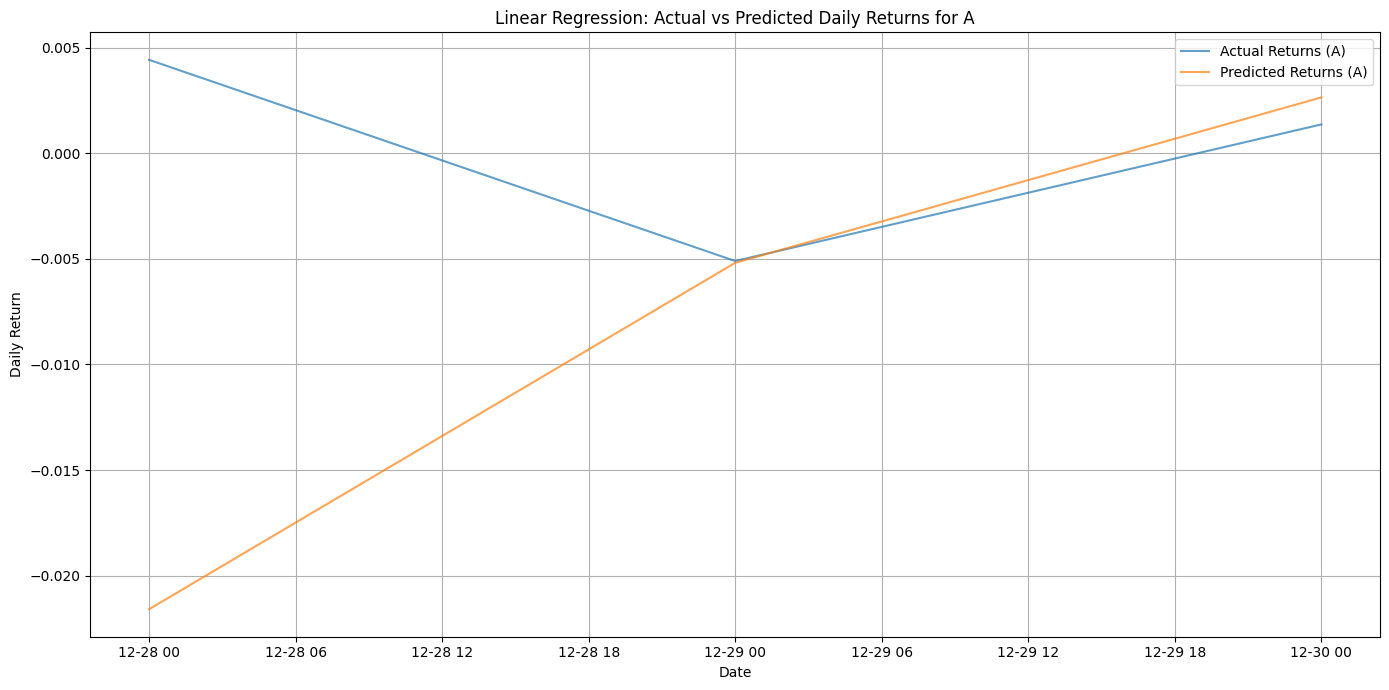

In [3]:
# Optional: Plotting predictions vs actual (requires matplotlib)
import matplotlib.pyplot as plt

# # Choose one target stock to plot for clarity, e.g., the first one
if selected_target_tickers:
     first_target_ticker = selected_target_tickers[0]
     first_target_col_name = f'Daily_Return_{first_target_ticker}'
#
#     # Ensure the target column actually exists in y_test (it should if it was valid)
     if first_target_col_name in y_test.columns:
         first_target_index = y_test.columns.get_loc(first_target_col_name)

         plt.figure(figsize=(14, 7))
         plt.plot(y_test.index, y_test[first_target_col_name], label=f'Actual Returns ({first_target_ticker})', alpha=0.7)
         plt.plot(y_test.index, y_pred[:, first_target_index], label=f'Predicted Returns ({first_target_ticker})', alpha=0.7)
         plt.title(f'Linear Regression: Actual vs Predicted Daily Returns for {first_target_ticker}')
         plt.xlabel('Date')
         plt.ylabel('Daily Return')
         plt.legend()
         plt.grid(True)
         plt.tight_layout()
         plt.show()
     else:
         print(f"Plotting skipped: {first_target_col_name} not found in y_test columns.")

In [2]:
!pip install tensorflow

In [3]:
!pip install pandas scikit-learn numpy 

  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import ast # Import the ast module for safe evaluation of string literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# --- Data Loading ---
df = None # Initialize df to None, so we can check if it gets assigned

try:
    # Load with a single header, as the "multi-index" names appear to be string representations of tuples
    df = pd.read_csv('investment_data1.csv', index_col=0, parse_dates=True)
    print("Data loaded successfully with single header.")
    print(f"Initial DataFrame shape: {df.shape}")
    print("Raw DataFrame columns (first 10):", df.columns.tolist()[:10])

    new_columns = []
    for col_name in df.columns:
        try:
            evaluated_col = ast.literal_eval(col_name)
            new_columns.append(evaluated_col)
        except (ValueError, SyntaxError):
            new_columns.append(col_name)
    df.columns = new_columns
    print("Columns parsed to tuples where applicable.")
    print("Parsed DataFrame columns (first 10):", df.columns.tolist()[:10])

except FileNotFoundError:
    print("Error: 'investment_data1.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if file not found
except Exception as e:
    print(f"An error occurred during data loading or column parsing: {e}")
    exit() # Exit for other loading/parsing errors

# Check if df was successfully loaded and is a DataFrame
if df is None or not isinstance(df, pd.DataFrame):
    print("Critical Error: DataFrame 'df' was not loaded or is not a pandas DataFrame. Exiting.")
    exit()

# --- Data Preprocessing and Feature/Target Selection ---

# 1. Identify Target Stocks and Calculate their Daily Logarithmic Returns
target_tickers = []
# Now, 'all_close_cols' will correctly identify tuple columns like ('Close', 'AAPL')
all_close_cols = [col for col in df.columns if isinstance(col, tuple) and col[0] == 'Close']

# Extract unique tickers from the ('Close', 'TICKER') columns
unique_close_tickers = sorted(list(set([col[1] for col in all_close_cols])))

# Select the first 100 tickers as targets, or fewer if less than 100 are available
num_target_tickers = min(100, len(unique_close_tickers))
selected_target_tickers = unique_close_tickers[:num_target_tickers]

if not selected_target_tickers:
    print("Error: No 'Close' price columns found for any tickers after parsing. Cannot define target variables.")
    exit()

print(f"\nSelected {len(selected_target_tickers)} target tickers: {selected_target_tickers}")

target_df = pd.DataFrame(index=df.index)
for ticker in selected_target_tickers:
    close_col_name = ('Close', ticker) # This will now be an actual tuple
    if close_col_name in df.columns:
        # Ensure the column is numeric before calculation
        df[close_col_name] = pd.to_numeric(df[close_col_name], errors='coerce')
        target_df[f'Daily_Return_{ticker}'] = np.log(df[close_col_name] / df[close_col_name].shift(1))
    else:
        print(f"Warning: Close price for {ticker} (expected as {close_col_name}) not found, skipping as target.")

# Drop any target columns that ended up being all NaN (e.g., if a ticker had no valid close data)
target_df.dropna(axis=1, how='all', inplace=True)
target_columns = target_df.columns.tolist()

if not target_columns:
    print("Error: No valid target columns could be created after calculating returns and dropping NaNs.")
    exit()

print(f"Created {len(target_columns)} target return columns.")

# 2. Identify Feature Columns (X) based on the paper and notebook structure
feature_columns = []

# Add Market_Index_Return
# Now, it should be identified as a tuple ('Market_Index_Return', '')
market_index_col_name = ('Market_Index_Return', '')
if market_index_col_name in df.columns:
    feature_columns.append(market_index_col_name)
    print("Added 'Market_Index_Return' (tuple format) to features.")
else:
    print("Warning: 'Market_Index_Return' (expected as tuple) not found.")


# Add Industry_Returns
# These are simple strings, so the original logic for them should work
industry_return_cols = [col for col in df.columns if isinstance(col, str) and col.endswith('_Industry_Return')]
if industry_return_cols:
    feature_columns.extend(industry_return_cols)
    print(f"Added {len(industry_return_cols)} industry return columns to features.")
else:
    print("No columns ending with '_Industry_Return' found.")

# Add PE and PB ratios for all tickers
# These are simple strings, so the original logic for them should work
pe_pb_cols = [col for col in df.columns if isinstance(col, str) and (col.endswith('_PE') or col.endswith('_PB'))]
if pe_pb_cols:
    feature_columns.extend(pe_pb_cols)
    print(f"Added {len(pe_pb_cols)} PE/PB ratio columns to features.")
else:
    print("No columns ending with '_PE' or '_PB' found.")

# Add Volume for each of the selected target tickers
# This assumes 'Volume' is also a tuple column like ('Volume', 'TICKER')
for ticker in selected_target_tickers:
    volume_col_name = ('Volume', ticker)
    if volume_col_name in df.columns:
        feature_columns.append(volume_col_name)
    else:
        print(f"Warning: Volume for {ticker} (expected as {volume_col_name}) not found, skipping as feature.")
print(f"Added Volume columns for selected target tickers to features.")


# Select features and target
# Ensure all feature columns exist and convert them to numeric
# Filter feature_columns to only include those actually found in df.columns
feature_columns_present = [col for col in feature_columns if col in df.columns]
if not feature_columns_present:
    print("Error: No valid feature columns found after filtering. Please check your data and feature selection logic.")
    exit()

X = df[feature_columns_present]

# Convert all feature column names to strings for scikit-learn compatibility
def convert_col_name_to_str(col):
    if isinstance(col, tuple):
        # Handle ('Market_Index_Return', '') -> 'Market_Index_Return'
        if col[1] == '':
            return col[0]
        # Handle ('Close', 'AAPL') -> 'Close_AAPL', ('Volume', 'MSFT') -> 'Volume_MSFT'
        else:
            return f"{col[0]}_{col[1]}"
    return col # Return as is if already a string

X.columns = [convert_col_name_to_str(col) for col in X.columns]
print(f"Converted feature column names to strings. Example: {X.columns.tolist()[:5]}")


for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop columns from X that became entirely NaN after numeric conversion
initial_feature_cols_count = X.shape[1]
X.dropna(axis=1, how='all', inplace=True)
if X.shape[1] < initial_feature_cols_count:
    print(f"Dropped {initial_feature_cols_count - X.shape[1]} feature columns that became all NaN.")

y = target_df[target_columns] # y is now a DataFrame with multiple target columns

# --- Handle missing values using interpolation ---
# Combine X and y for interpolation to ensure alignment
combined_data = pd.concat([X, y], axis=1)
print(f"\nShape before interpolation: {combined_data.shape}")

# Apply time-based interpolation. 'limit_direction='both'' fills NaNs at start/end if possible.
# This is generally more suitable for time series than mean imputation.
combined_data_interpolated = combined_data.interpolate(method='time', limit_direction='both')

# After interpolation, there might still be NaNs if a whole series is NaN or at the very edges
# We'll drop any remaining rows with NaNs, which should be far fewer now.
initial_rows_after_interp = combined_data_interpolated.shape[0]
data_cleaned = combined_data_interpolated.dropna()
rows_dropped_after_interp = initial_rows_after_interp - data_cleaned.shape[0]
print(f"Dropped {rows_dropped_after_interp} rows with remaining missing values after interpolation.")


X = data_cleaned[X.columns] # Re-select features from the cleaned data
y = data_cleaned[y.columns] # Re-select targets from the cleaned data

if X.empty or y.empty:
    print("Error: After handling missing values, the dataset for training is empty. Check your data and preprocessing steps.")
    exit()

print(f"Final dataset shape after interpolation and dropping remaining NaNs: {X.shape}")


# --- Feature Scaling ---
# Scale features (X) and targets (y) separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)

# Convert back to DataFrame to maintain index and column names for time series splitting
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, index=y.index, columns=y.columns)

# --- Create Time Series Sequences for LSTM ---
def create_sequences(features, targets, lookback):
    X_seq, y_seq = [], []
    # Ensure features and targets are numpy arrays for consistent indexing
    features_np = features.values if isinstance(features, pd.DataFrame) else features
    targets_np = targets.values if isinstance(targets, pd.DataFrame) else targets

    for i in range(len(features_np) - lookback):
        X_seq.append(features_np[i:(i + lookback)])
        y_seq.append(targets_np[i + lookback]) # Predict the next step
    return np.array(X_seq), np.array(y_seq)

# REDUCED LOOKBACK WINDOW
lookback_window = 5 # Number of past days to look back for prediction (reduced from 60)
print(f"\nCreating sequences with a lookback window of {lookback_window} days...")
print(f"Number of data points available after cleaning: {len(X_scaled_df)}")


# Pass the DataFrames to create_sequences, it will convert them to numpy arrays internally
X_sequences, y_sequences = create_sequences(X_scaled_df, y_scaled_df, lookback_window)

print(f"Shape of X_sequences: {X_sequences.shape}") # (samples, timesteps, features)
print(f"Shape of y_sequences: {y_sequences.shape}") # (samples, targets)

# Added a more robust check for sequence dimensions
if X_sequences.shape[0] == 0 or X_sequences.ndim < 3:
    print("Error: Not enough data to create sequences with the specified lookback window, or sequences are not 3D.")
    print("Please reduce lookback_window further or consider more robust data imputation methods.")
    exit()

# --- Train-Test Split (Chronological) ---
train_size_seq = int(len(X_sequences) * 0.8)

if train_size_seq < 1:
    print("Error: Training set size for sequences is too small after data cleaning and sequence creation. Cannot perform train-test split.")
    exit()

X_train_seq, X_test_seq = X_sequences[:train_size_seq], X_sequences[train_size_seq:]
y_train_seq, y_test_seq = y_sequences[:train_size_seq], y_sequences[train_size_seq:]

print(f"\nTraining sequences shape: {X_train_seq.shape}")
print(f"Testing sequences shape: {X_test_seq.shape}")
print(f"Training target sequences shape: {y_train_seq.shape}")
print(f"Testing target sequences shape: {y_test_seq.shape}")

# --- Build the LSTM Model ---
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(lookback_window, X_sequences.shape[2])),
    Dropout(0.3),
    LSTM(units=100, return_sequences=False), # Last LSTM layer does not return sequences
    Dropout(0.3),
    Dense(units=len(target_columns)) # Output layer with number of target stocks
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# --- Train the LSTM Model ---
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nTraining LSTM model...")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50, # You can increase this for more training
    batch_size=32,
    validation_split=0.1, # Use a portion of training data for validation
    callbacks=[early_stopping],
    verbose=1
)
print("LSTM Model Training Complete.")

# --- Evaluate the Model ---
print("\nEvaluating LSTM model on test set...")
y_pred_scaled = model.predict(X_test_seq)

# Inverse transform predictions and actual values to original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_original = target_scaler.inverse_transform(y_test_seq)

# Evaluate each target separately
print(f"\nModel Evaluation on Test Set for {len(target_columns)} Target Stocks:")
for i, target_col in enumerate(target_columns):
    mse = mean_squared_error(y_test_original[:, i], y_pred[:, i])
    r2 = r2_score(y_test_original[:, i], y_pred[:, i])
    print(f"  {target_col}:")
    print(f"    Mean Squared Error (MSE): {mse:.6f}")
    print(f"    R-squared (R²): {r2:.4f}")

# Display a sample of actual vs predicted for the first target stock
if len(target_columns) > 0:
    first_target_col = target_columns[0]
    first_target_idx = 0
    print(f"\nSample of Actual vs Predicted for {first_target_col} (first 5 test samples):")
    for i in range(min(5, len(y_test_original))):
        print(f"  Actual: {y_test_original[i, first_target_idx]:.6f}, Predicted: {y_pred[i, first_target_idx]:.6f}")


# Optional: Plotting predictions vs actual for one target stock
# import matplotlib.pyplot as plt
#
# if selected_target_tickers:
#     first_target_ticker = selected_target_tickers[0]
#     first_target_col_name = f'Daily_Return_{first_target_ticker}'
#
#     # Find the index of this target column in the original target_columns list
#     try:
#         first_target_index = target_columns.index(first_target_col_name)
#
#         plt.figure(figsize=(14, 7))
#         # Use the original dates from the test set for plotting
#         # The dates for y_test_seq correspond to df.index[train_size_seq + lookback_window : ]
#         # Need to get the correct slice of the original index for the test set
#         test_start_index_in_original_df = len(X_scaled_df) - len(y_test_original)
#         actual_test_dates = X_scaled_df.index[test_start_index_in_original_df : test_start_index_in_original_df + len(y_test_original)]
#
#         plt.plot(actual_test_dates, y_test_original[:, first_target_index], label=f'Actual Returns ({first_target_ticker})', alpha=0.7)
#         plt.plot(actual_test_dates, y_pred[:, first_target_index], label=f'Predicted Returns ({first_target_ticker})', alpha=0.7)
#         plt.title(f'LSTM: Actual vs Predicted Daily Returns for {first_target_ticker}')
#         plt.xlabel('Date')
#         plt.ylabel('Daily Return')
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()
#     except ValueError:
#         print(f"Plotting skipped: {first_target_col_name} not found in target_columns.")


Data loaded successfully with single header.
Initial DataFrame shape: (2768, 3636)
Raw DataFrame columns (first 10): ["('Market_Index_Return', '')", 'Advertising Agencies_Industry_Return', 'Aerospace & Defense_Industry_Return', 'Agricultural Inputs_Industry_Return', 'Airlines_Industry_Return', 'Apparel Manufacturing_Industry_Return', 'Apparel Retail_Industry_Return', 'Asset Management_Industry_Return', 'Auto & Truck Dealerships_Industry_Return', 'Auto Manufacturers_Industry_Return']
Columns parsed to tuples where applicable.
Parsed DataFrame columns (first 10): [('Market_Index_Return', ''), 'Advertising Agencies_Industry_Return', 'Aerospace & Defense_Industry_Return', 'Agricultural Inputs_Industry_Return', 'Airlines_Industry_Return', 'Apparel Manufacturing_Industry_Return', 'Apparel Retail_Industry_Return', 'Asset Management_Industry_Return', 'Auto & Truck Dealerships_Industry_Return', 'Auto Manufacturers_Industry_Return']

Selected 100 target tickers: ['A', 'AAPL', 'ABBV', 'ABNB', 'AB

C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_30204\1417869806.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')
C:\Users\PRAJWAL\AppData\Local\Temp\ipykernel_30204\1417869806.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=1, how='all', inplace=True)


Dropped 29 feature columns that became all NaN.

Shape before interpolation: (2768, 1288)
Dropped 0 rows with remaining missing values after interpolation.
Final dataset shape after interpolation and dropping remaining NaNs: (2768, 1190)

Creating sequences with a lookback window of 5 days...
Number of data points available after cleaning: 2768
Shape of X_sequences: (2763, 5, 1190)
Shape of y_sequences: (2763, 98)

Training sequences shape: (2210, 5, 1190)
Testing sequences shape: (553, 5, 1190)
Training target sequences shape: (2210, 98)
Testing target sequences shape: (553, 98)


e:\Multi-factor-investment-DL\my_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 100)         │       516,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 98)             │         9,898 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 606,698 (2.31 MB)

 Trainable params: 606,698 (2.31 MB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1189 - val_loss: 0.0029
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0152 - val_loss: 0.0027
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0105 - val_loss: 0.0027
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0085 - val_loss: 0.0027
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075 - val_loss: 0.0029
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 